In [57]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import sys
sys.path.append('../models/stylegan2')
import dnnlib
import dnnlib.tflib as tflib
from run_generator import generate_images
from training import misc
import projector
import pretrained_networks
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
from os.path import join as oj
import pandas as pd
import pickle as pkl
import gan_helper
import sklearn.model_selection
import torch
import models
import util

GAN = gan_helper.Generator() # initializes gan
print('Done!')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading networks from "gdrive:networks/stylegan2-ffhq-config-f.pkl"...
Done!


# get an image

In [58]:
IMAGES_DIR = '../data/annotation-dataset-stylegan2/images'
z = np.zeros(512).reshape((1, 512))
im = GAN.gen(z)

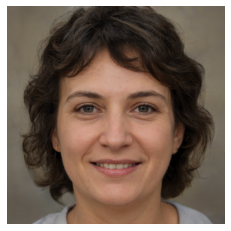

In [59]:
util.imshow(im[0])

# try projecting it back

In [66]:
latents = GAN.project(im, image_prefix='im0', num_steps=50)

writing to projections/im0


array([[[-0.76554954,  0.305353  , -0.01456775, ..., -0.378627  ,
          0.8723395 ,  0.08670193],
        [-0.76554954,  0.305353  , -0.01456775, ..., -0.378627  ,
          0.8723395 ,  0.08670193],
        [-0.76554954,  0.305353  , -0.01456775, ..., -0.378627  ,
          0.8723395 ,  0.08670193],
        ...,
        [-0.76554954,  0.305353  , -0.01456775, ..., -0.378627  ,
          0.8723395 ,  0.08670193],
        [-0.76554954,  0.305353  , -0.01456775, ..., -0.378627  ,
          0.8723395 ,  0.08670193],
        [-0.76554954,  0.305353  , -0.01456775, ..., -0.378627  ,
          0.8723395 ,  0.08670193]]], dtype=float32)

(1, 3, 1024, 1024)


target_images.shape (1, 3, 1024, 1024)
(1, 3, 256, 256)


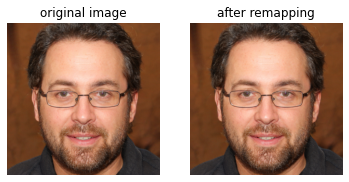

In [57]:
N_IMS = 5
z0 = X[0:1]
a = m(torch.Tensor(z0))
z = util.detach(m(a, rev=True))
assert np.allclose(z0, z, atol=1e-6), 'inversion was unsuccesful'
images = GAN.gen(np.vstack((z0, z)))
R = 1
C = 2
plt.subplot(R, C, 1)
plt.title('original image')
util.imshow(images[0])

plt.subplot(R, C, 2)
plt.title('after remapping')
util.imshow(images[1])

plt.show()
# attrs = np.zeros((N_IMS, 512))